In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Passo 1: Ler o Dataset
dataset_url = "https://archive.ics.uci.edu/static/public/176/data.csv"
df = pd.read_csv(dataset_url)
df

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
# Exibir as primeiras linhas para verificar o carregamento
print("\nPrimeiras linhas do dataset:")
df.head()



Primeiras linhas do dataset:


,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
# Passo 2: Análise Exploratória dos Dados (EDA)
print("\nResumo estatístico do dataset:")
df.describe()


Resumo estatístico do dataset:


,Recency,Frequency,Monetary,Time,Donated_Blood
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
# Contar doadores (1) e não doadores (0)
print("\nDistribuição da variável alvo (Donated_Blood):")
df['Donated_Blood'].value_counts()


Distribuição da variável alvo (Donated_Blood):


Donated_Blood
0    570
1    178
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

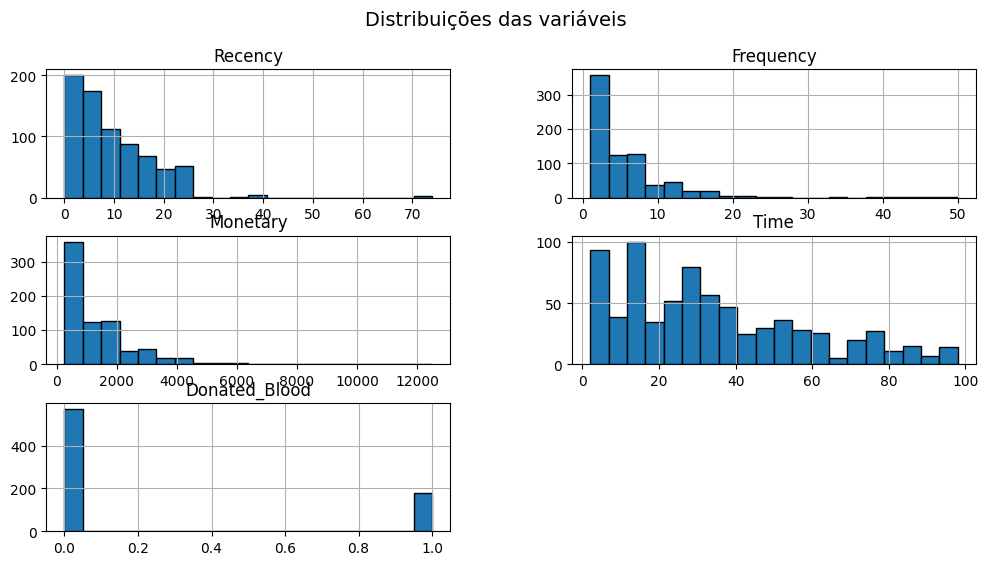

In [7]:
# Passo 3: Visualizar os Dados
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 6), edgecolor='black')
plt.suptitle("Distribuições das variáveis", fontsize=14)
plt.show()

In [ ]:
# Interpretação dos Histogramas
# Os histogramas gerados no "Passo 3" mostram a distribuição de cada uma dessas variáveis. Aqui está uma análise geral do que você pode observar:

# Recency:

# Mostra a frequência de doadores com base no tempo desde a última doação.
# Pode revelar se há mais doadores recentes ou se a maioria não doa há muito tempo.
# Frequency:

# Indica quantas vezes os indivíduos doaram sangue.
# Pode mostrar se há um padrão comum, como doadores frequentes ou ocasionais.
# Monetary:

# Representa o total de sangue doado em mililitros.
# Como é proporcional à frequência, pode ter uma distribuição semelhante à coluna Frequency.
# Time:

# Mostra o tempo desde o primeiro registro de doação.
# Pode indicar se há mais doadores novos ou antigos.
# Donated_Blood:

# Como é uma variável binária (0 ou 1), o histograma terá apenas duas barras.
# Mostra a proporção de pessoas que doaram sangue recentemente (1) em relação às que não doaram (0).
# Próximos Passos
# Identificar padrões: Verifique se as distribuições são uniformes, concentradas ou assimétricas.
# Outliers: Observe se há valores extremos, como doadores com valores muito altos de Frequency ou Monetary.
# Correlação: Use gráficos adicionais (como scatter plots) para explorar relações entre variáveis, por exemplo, entre Recency e Donated_Blood.

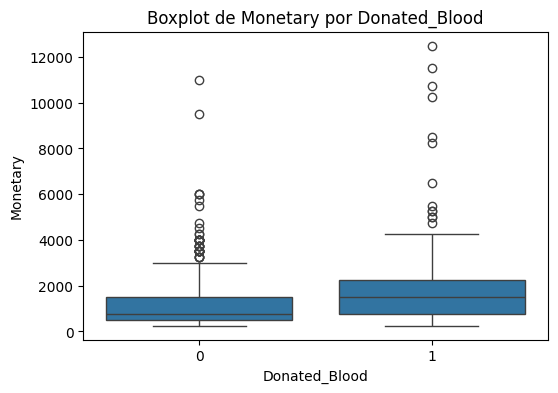

In [8]:
# Boxplot de Monetary por Donated_Blood
plt.figure(figsize=(6, 4))
sns.boxplot(x='Donated_Blood', y='Monetary', data=df)
plt.title("Boxplot de Monetary por Donated_Blood")
plt.show()

In [10]:
# Passo 4: Análise Estatística
# ANOVA para verificar diferenças na Frequency entre doadores e não doadores
model = ols('Frequency ~ C(Donated_Blood)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nResultados da ANOVA para Frequency:")
print(anova_table)

# Teste t para comparar Monetary entre doadores e não doadores
doadores = df[df['Donated_Blood'] == 1]['Monetary']
nao_doadores = df[df['Donated_Blood'] == 0]['Monetary']
t_stat, p_value = stats.ttest_ind(doadores, nao_doadores)
print("\nTeste t para Monetary entre doadores e não doadores:")
print(f"Estatística t: {t_stat:.4f}, Valor p: {p_value:.4f}")

# Se ANOVA for significativa, realizar teste de Tukey
tukey = sm.stats.multicomp.pairwise_tukeyhsd(df['Frequency'], df['Donated_Blood'])
print("\nTeste de Tukey para Frequency:")
print(tukey)


Resultados da ANOVA para Frequency:
                        sum_sq     df          F        PR(>F)
C(Donated_Blood)   1217.520889    1.0  37.449334  1.514734e-09
Residual          24253.317347  746.0        NaN           NaN

Teste t para Monetary entre doadores e não doadores:
Estatística t: 6.1196, Valor p: 0.0000

Teste de Tukey para Frequency:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    2.996   0.0 2.0349 3.9571   True
-------------------------------------------------


In [11]:
# Passo 5: Interpretação dos Resultados
# Os valores de p indicarão se há diferenças estatisticamente significativas entre os grupos
if anova_table['PR(>F)'][0] < 0.05:
    print("\nA ANOVA indicou uma diferença significativa em Frequency entre doadores e não doadores.")
else:
    print("\nA ANOVA não indicou diferença significativa em Frequency entre os grupos.")

if p_value < 0.05:
    print("O teste t indicou uma diferença significativa em Monetary entre os grupos.")
else:
    print("O teste t não indicou diferença significativa em Monetary entre os grupos.")


A ANOVA indicou uma diferença significativa em Frequency entre doadores e não doadores.
O teste t indicou uma diferença significativa em Monetary entre os grupos.


C:\Users\Nicolau\AppData\Local\Temp\ipykernel_30524\4075549879.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
